<a href="https://colab.research.google.com/github/Pranav-Nirbhavane/insurance_premium_ml/blob/main/end_to_end_insurance_premium_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **💸 Predicting the premium for insurance using Machine Learning**

In this notebook, we are going through a machine learning project with the goal of predicting the premium to be paid for insurance.

# **1. Problem Defination**
> The objectives of this project is to predict insurance premiums based on various factors.

# **2. Data**

> The data is downloaded from the kaggle playground prediction competition:
https://www.kaggle.com/competitions/playground-series-s4e12

> For this competition, you are predicting the premium of insurance for customers.

# **3. Evaluation**
> The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted premiums.

For more on the evaluation for the project check the below link.

https://www.kaggle.com/competitions/playground-series-s4e12/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error.

# **4. Features**

1. **id**
2. **Age**: The age of the individual.
3. **Gender**: The gender of the individual (`Male` or `Female`).
4. **Annual Income**: Income of the individual.
5. **Marital Status**: Whether the person is `Single`,`Married` or `Divorced`.
6. **Number of Dependents**: Number of dependent members on an indivisual.
7. **Education Level**: Qualification level of an indivisual.
8. **Occupation**: Whether the person is `Employed`, `Unemployed` or `self-employed`.
9. **Health Score**
10. **Location**: Whether the indivisual stays in `Urban`, `Suburban` or `Rural` area.
11. **Policy Type**: Whether theperson opted for `Premium`, `Comprehensive` or `Basic`.
12. **Previous Claims**: Number of claims made previously.
13. **Vehicle Age**: Age of the vehicle.
14. **Credit Score**: Credit score of an indivisual in range (300 - 900).
15. **Insurance Duration**: Number of years for the policy to mature.
16. **Policy Start Date**
17. **Customer Feedback**: Feedback of customer can be `Good`, `Average` or `Poor`.
18. **Smoking Status**: Whether the person smokes or not.
19. **Exercise Frequency**: How frequently an indivisual exercises.
20. **Property Type**: Type of property.
21. **Premium Amount**: Outcome variable.


# **1. Preparing the tools**

In [ ]:
# Import necessary EDA tools
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

# Import preprocessing tools
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score

# Import models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Import Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import root_mean_squared_log_error, r2_score

# **2. Load the data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/Insurance via ML/train.csv', parse_dates=['Policy Start Date'])
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [ ]:
# Getting info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1200000 non-null  int64         
 1   Age                   1181295 non-null  float64       
 2   Gender                1200000 non-null  object        
 3   Annual Income         1155051 non-null  float64       
 4   Marital Status        1181471 non-null  object        
 5   Number of Dependents  1090328 non-null  float64       
 6   Education Level       1200000 non-null  object        
 7   Occupation            841925 non-null   object        
 8   Health Score          1125924 non-null  float64       
 9   Location              1200000 non-null  object        
 10  Policy Type           1200000 non-null  object        
 11  Previous Claims       835971 non-null   float64       
 12  Vehicle Age           1199994 non-null  fl

In [ ]:
# Features of the data
df.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [ ]:
# Shape and size of the data
df.shape, df.size

((1200000, 21), 25200000)

In [ ]:
df.dtypes

,0
id,int64
Age,float64
Gender,object
Annual Income,float64
Marital Status,object
Number of Dependents,float64
Education Level,object
Occupation,object
Health Score,float64
Location,object


In [ ]:
# Checking if there are NaN values
df.isna().sum()

,0
id,0
Age,18705
Gender,0
Annual Income,44949
Marital Status,18529
Number of Dependents,109672
Education Level,0
Occupation,358075
Health Score,74076
Location,0


In [ ]:
df.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1200000,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,2022-02-13 05:06:30.972380672,1.102545e+03
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2019-08-17 15:21:39.080371,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,2020-11-20 15:21:39.121168896,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,2022-02-14 15:21:39.151731968,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,2023-05-06 15:21:39.182597120,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,2024-08-15 15:21:39.287115,4.999000e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,NaN,8.649989e+02


# **3. Exploratory Data Analysis**

In [ ]:
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


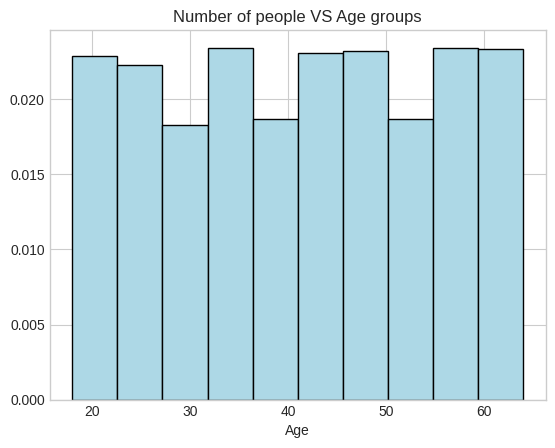

In [ ]:
# Age group distribution
fig,ax = plt.subplots()
ax.hist(df['Age'],color='lightblue', density=True, bins=10, edgecolor='black')
ax.set(xlabel='Age',
       title='Number of people VS Age groups');

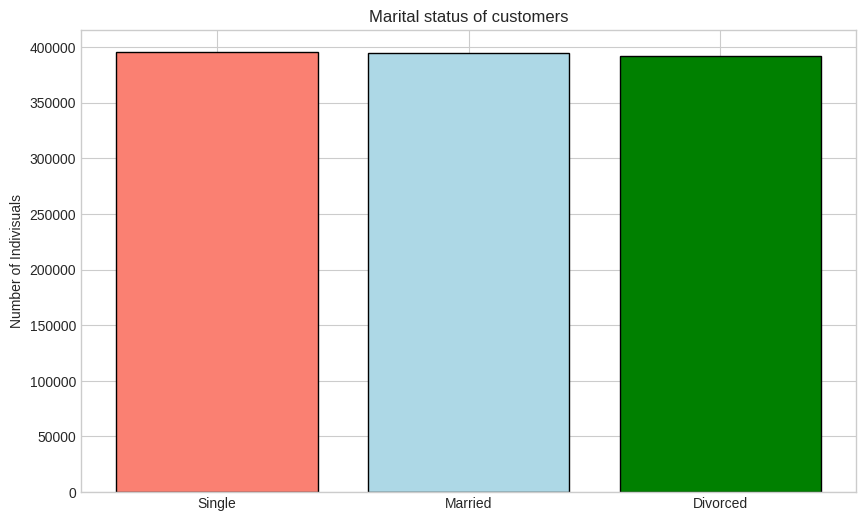

In [ ]:
# Bar graph for marital status of customers
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x=['Single','Married','Divorced'],
       height=df['Marital Status'].value_counts(),
       color=['salmon','lightblue','green'],
       edgecolor='black')
ax.set(title='Marital status of customers',
       ylabel='Number of Indivisuals');

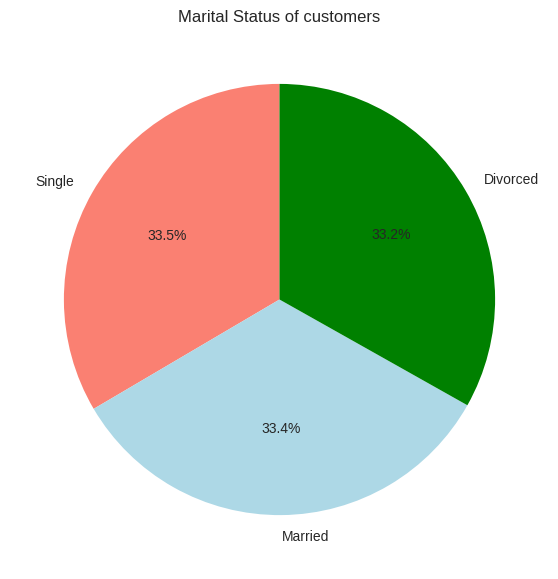

In [ ]:
# Pie chart for marital status of customer
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(df['Marital Status'].value_counts(),
       labels=['Single', 'Married','Divorced'],
       colors=['salmon','lightblue','green'],
       startangle=90,
       autopct='%1.1f%%')
ax.set(title='Marital Status of customers');

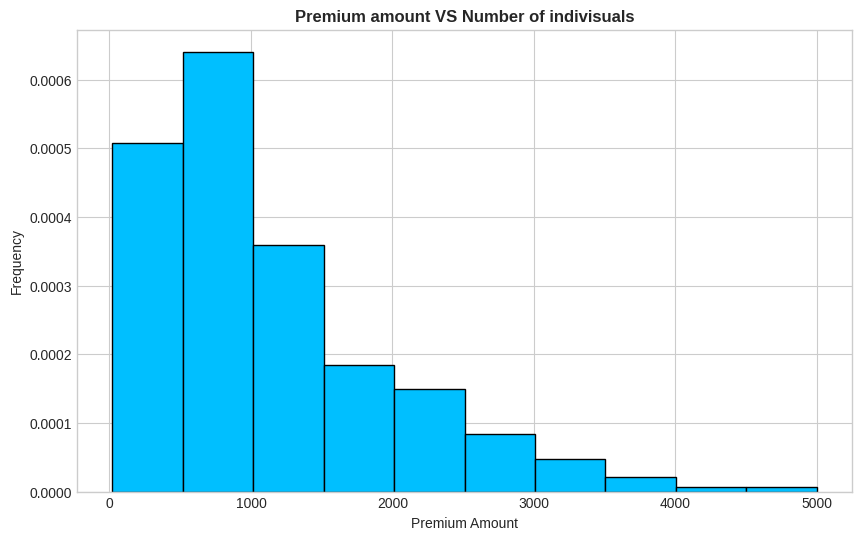

In [ ]:
# Histogram for Premium amount
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df['Premium Amount'],
        bins=10,
        density=True,
        color='deepskyblue',
        edgecolor='black')
ax.set(xlabel='Premium Amount',
       ylabel='Frequency')
ax.set_title('Premium amount VS Number of indivisuals', fontweight='bold');

In [ ]:
# Gender based smoking status
pd.crosstab(df['Gender'],df['Smoking Status'])

Smoking Status,No,Yes
Gender,,
Female,298738,298691
Male,299389,303182


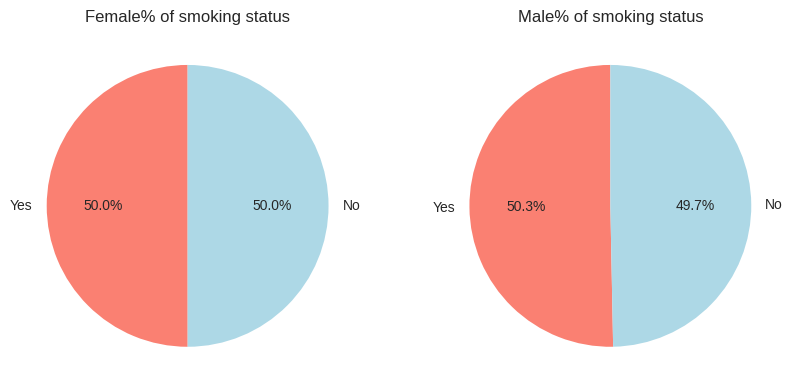

In [ ]:
# Gender based smoking status of different indivisuals
fig, (ax0,ax1) = plt.subplots(figsize=(10,6),nrows=1, ncols=2)
ax0.pie(df['Smoking Status'][df['Gender']=='Female'].value_counts(),
        labels=['Yes', 'No'],
        colors=['salmon','lightblue'],
        startangle=90,
        autopct='%1.1f%%')
ax0.set(title='Female% of smoking status')
ax1.pie(df['Smoking Status'][df['Gender']=='Male'].value_counts(),
        labels=['Yes', 'No'],
        colors=['salmon','lightblue'],
        startangle=90,
        autopct='%1.1f%%')
ax1.set(title='Male% of smoking status');

In [ ]:
# Gender based Marital Status
pd.crosstab(df['Gender'],df['Marital Status'])

Marital Status,Divorced,Married,Single
Gender,,,
Female,195680,195670,196750
Male,196084,198646,198641


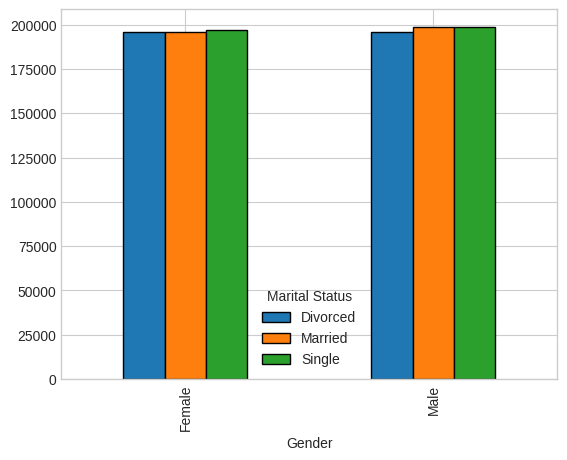

In [ ]:
# Visualisation of Gender based Marital Status
pd.crosstab(df['Gender'],df['Marital Status']).plot.bar(edgecolor='black');

In [ ]:
# Gender based Education levels
pd.crosstab(df['Gender'],df['Education Level'])

Education Level,Bachelor's,High School,Master's,PhD
Gender,,,,
Female,151039,144304,151012,151074
Male,152195,145137,152806,152433


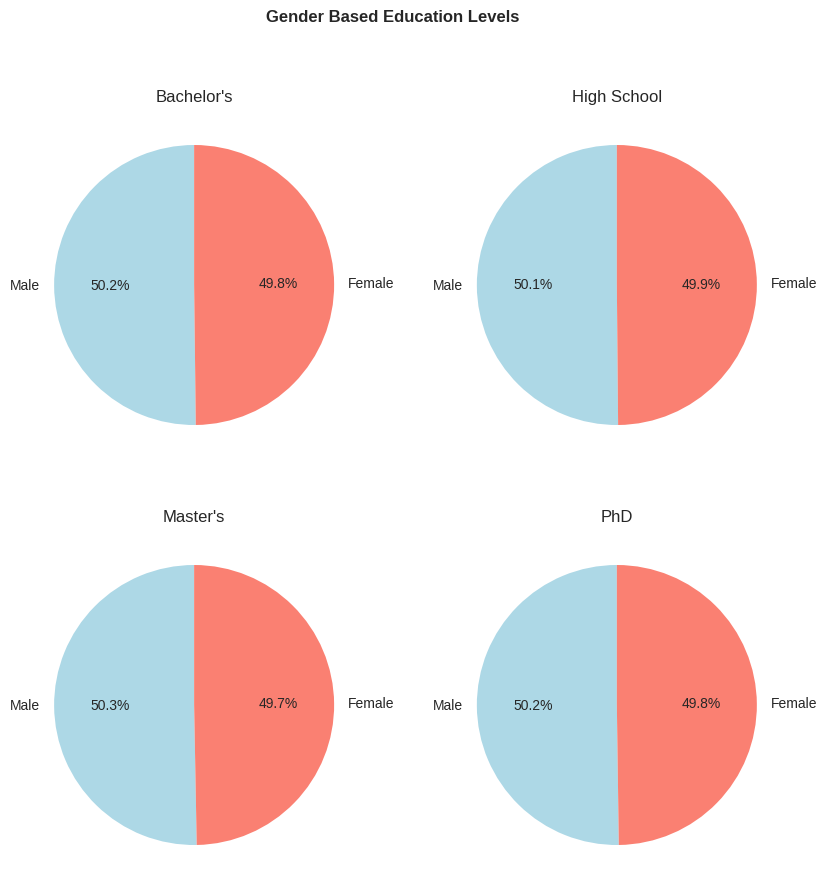

In [ ]:
# Visualisation of Gender based Education levels
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(figsize=(10,10),
                                          nrows=2,
                                          ncols=2)
ax0.pie(df['Gender'][df['Education Level']=="Bachelor's"].value_counts(),
        labels=['Male', 'Female'],
        colors=['lightblue','salmon'],
        startangle=90,
        autopct='%1.1f%%')
ax0.set(title="Bachelor's")
ax1.pie(df['Gender'][df['Education Level']=="High School"].value_counts(),
        labels=['Male', 'Female'],
        colors=['lightblue','salmon'],
        startangle=90,
        autopct='%1.1f%%')
ax1.set(title='High School')
ax2.pie(df['Gender'][df['Education Level']=="Master's"].value_counts(),
        labels=['Male', 'Female'],
        colors=['lightblue','salmon'],
        startangle=90,
        autopct='%1.1f%%')
ax2.set(title="Master's")
ax3.pie(df['Gender'][df['Education Level']=="PhD"].value_counts(),
        labels=['Male', 'Female'],
        colors=['lightblue','salmon'],
        startangle=90,
        autopct='%1.1f%%')
ax3.set(title="PhD")
fig.suptitle('Gender Based Education Levels', fontweight='bold');

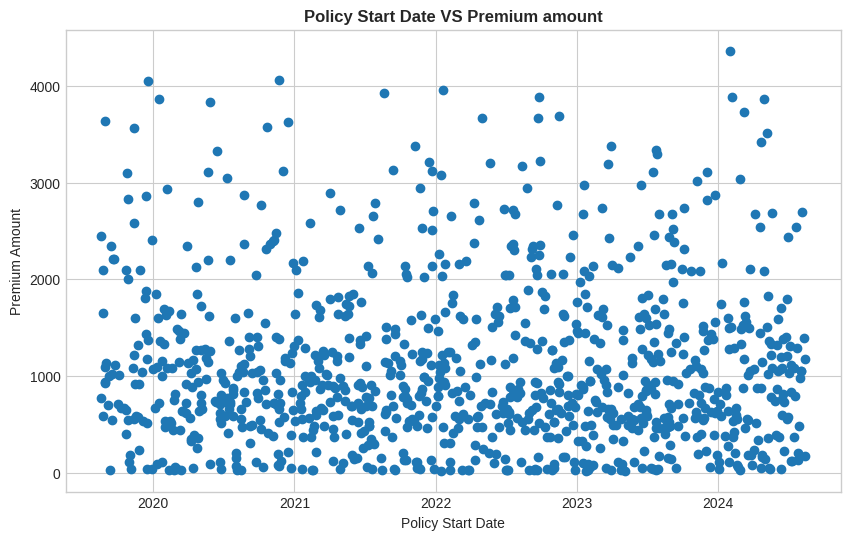

In [ ]:
# Visualisation of Policy start date VS Premium amount
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Policy Start Date'][:1000],
           df['Premium Amount'][:1000])
ax.set(xlabel='Policy Start Date',
       ylabel='Premium Amount')
ax.set_title('Policy Start Date VS Premium amount', fontweight='bold');

In [ ]:
# Gender based Exercise status
pd.crosstab(df['Gender'][:1000], df['Exercise Frequency'][:1000])

Exercise Frequency,Daily,Monthly,Rarely,Weekly
Gender,,,,
Female,108,129,139,134
Male,125,108,125,132


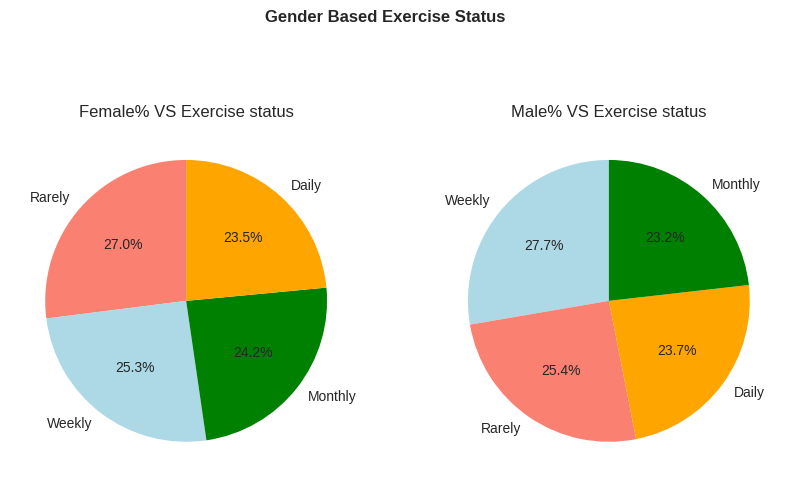

In [ ]:
# Visualisation for gender based Exercise status
fig, (ax0,ax1) = plt.subplots(figsize=(10,6),nrows=1, ncols=2)
ax0.pie(df[df['Gender']=='Female']['Exercise Frequency'][:1000].value_counts(),
        labels=['Rarely','Weekly','Monthly','Daily'],
        colors=['salmon','lightblue','green','orange'],
        startangle=90,
        autopct='%1.1f%%')
ax0.set(title='Female% VS Exercise status')
ax1.pie(df[df['Gender']=='Male']['Exercise Frequency'][:1000].value_counts(),
        labels=['Weekly','Rarely','Daily','Monthly'],
        colors=['lightblue','salmon','orange','green'],
        startangle=90,
        autopct='%1.1f%%')
ax1.set(title='Male% VS Exercise status')
fig.suptitle('Gender Based Exercise Status', fontweight='bold');

In [ ]:
# Converting the Gender feature into numbers
df['Gender'] = df['Gender'].replace({'Female':0, 'Male':1})
df.head()

<ipython-input-23-2c3ad62dcd52>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Female':0, 'Male':1})


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,0,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,0,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,1,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,1,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,1,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:2242: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:2249: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/usr/local/lib/python3.11/dist-packages/matplotlib/ticker.py:561: UserWarning: Warning: converting a masked element to nan.
  else fmt % arg)


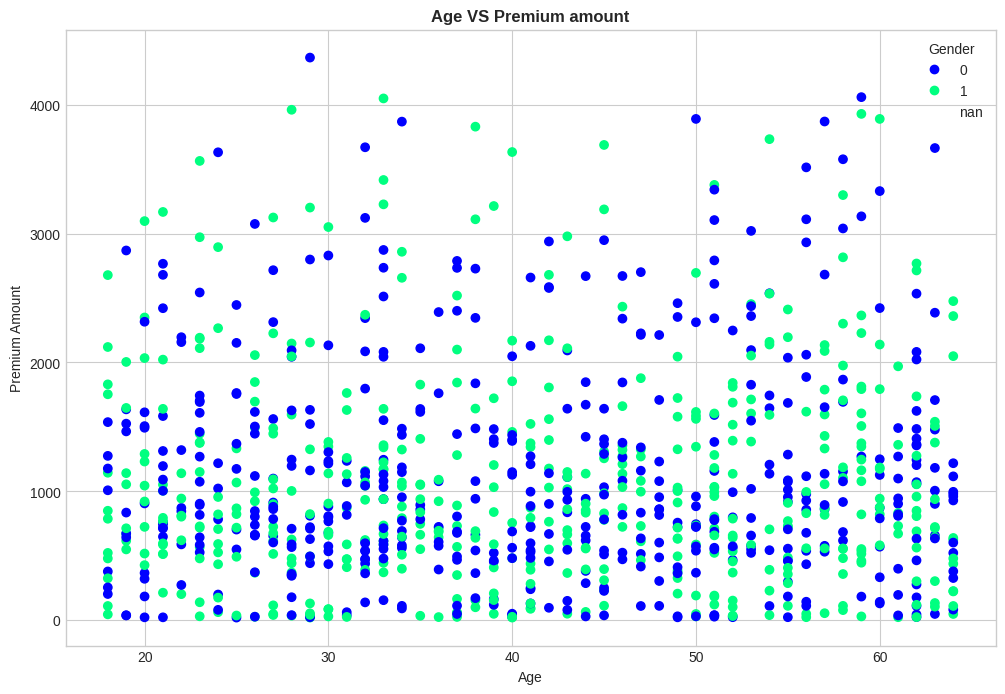

In [ ]:
# Visualisation for gender based Age VS Premium amount
fig, ax = plt.subplots(figsize=(12,8))
scatter = ax.scatter(df['Age'][:1000],
                     df['Premium Amount'][:1000],
                     c=df['Gender'][:1000],
                     cmap='winter')
ax.legend(*scatter.legend_elements(), title='Gender')
ax.set(xlabel='Age',
       ylabel='Premium Amount')
ax.set_title('Age VS Premium amount', fontweight='bold');

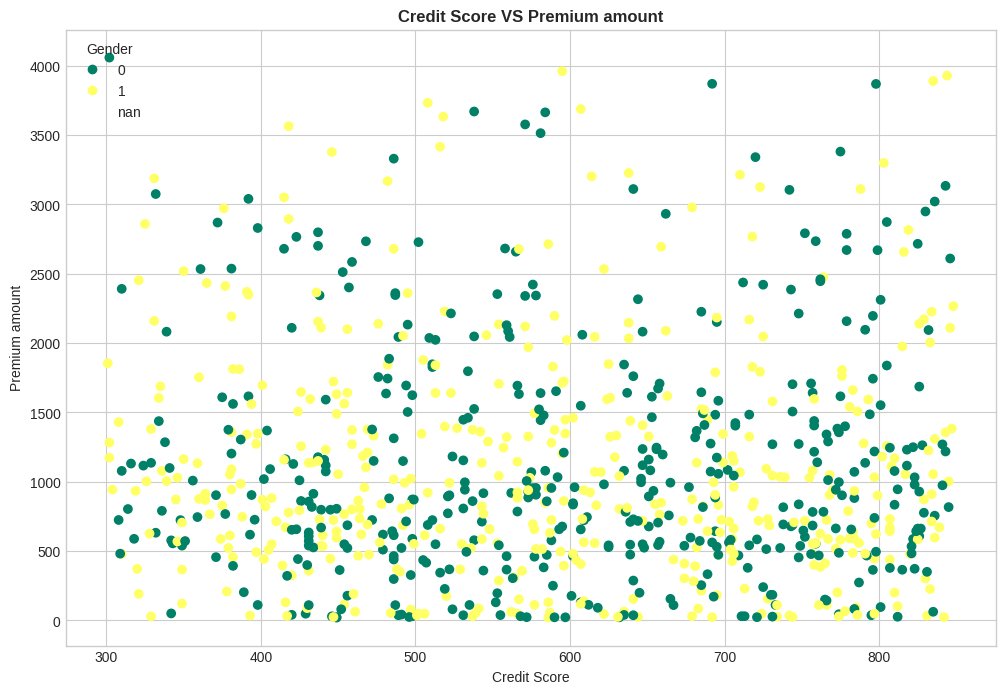

In [ ]:
# Visualisation for gender based Credit Score VS Premium
fig, ax = plt.subplots(figsize=(12,8))
scatter = ax.scatter(df['Credit Score'][:1000],
                     df['Premium Amount'][:1000],
                     c=df['Gender'][:1000],
                     cmap='summer'
                     )
ax.legend(*scatter.legend_elements(), title='Gender')
ax.set(xlabel='Credit Score',
       ylabel='Premium amount')
ax.set_title('Credit Score VS Premium amount', fontweight='bold');

# **4. Pre-proccessing the data**

Since the dataset present has more than 100k entries present. Better to preprocess the data like filling the `NaN` values and converting the features into numerical values.

In [ ]:
# Taking a copy of original datset and sorting it according to Policy Start Date
df_copy = df.copy()
df_copy.sort_values(by=['Policy Start Date'], inplace=True, ascending=True)
df_copy.head(10)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
1112515,1112515,19.0,0,33.0,Divorced,2.0,Master's,Employed,27.068329,Rural,...,0.0,17.0,480.0,5.0,2019-08-17 15:21:39.080371,Good,No,Rarely,Condo,1328.0
364240,364240,45.0,0,102043.0,Single,0.0,Bachelor's,Employed,36.477553,Rural,...,1.0,14.0,543.0,6.0,2019-08-17 15:21:39.080440,Poor,No,Daily,Condo,20.0
957582,957582,33.0,1,7894.0,NaN,1.0,High School,Employed,35.986064,Suburban,...,0.0,6.0,445.0,5.0,2019-08-17 15:21:39.080440,Average,No,Rarely,Condo,730.0
994714,994714,58.0,1,47253.0,Single,NaN,PhD,Employed,24.981910,Urban,...,NaN,14.0,485.0,8.0,2019-08-17 15:21:39.080440,Good,Yes,Rarely,Condo,2979.0
212928,212928,40.0,1,3050.0,Single,3.0,PhD,NaN,18.849237,Suburban,...,1.0,19.0,716.0,7.0,2019-08-17 15:21:39.080440,Average,Yes,Daily,Apartment,688.0
931368,931368,29.0,1,8281.0,Married,1.0,Master's,NaN,36.233023,Urban,...,NaN,7.0,305.0,2.0,2019-08-17 15:21:39.080440,Good,No,Daily,Apartment,1870.0
30496,30496,29.0,0,137548.0,Married,2.0,Bachelor's,Unemployed,32.670053,Suburban,...,0.0,11.0,719.0,8.0,2019-08-17 15:21:39.080440,Good,Yes,Weekly,Condo,359.0
963366,963366,53.0,1,29474.0,Divorced,0.0,PhD,NaN,12.104837,Suburban,...,0.0,10.0,527.0,5.0,2019-08-17 15:21:39.080440,Average,No,Weekly,House,861.0
1034516,1034516,54.0,1,4499.0,Married,0.0,High School,Self-Employed,20.079741,Rural,...,1.0,12.0,811.0,7.0,2019-08-17 15:21:39.081504,Poor,Yes,Weekly,Apartment,2363.0
676777,676777,24.0,0,382.0,Married,2.0,PhD,Employed,32.232586,Urban,...,2.0,18.0,NaN,9.0,2019-08-17 15:21:39.082499,NaN,No,Daily,Condo,923.0


# **4.1 Converting the `Policy Start date` in `year`,`month`,`day`,`dayofweek` and `dayofyear`.**

In [ ]:
# Making the columns
df_copy['startYear'] = df_copy['Policy Start Date'].dt.year
df_copy['startMonth'] = df_copy['Policy Start Date'].dt.month
df_copy['startDay'] = df_copy['Policy Start Date'].dt.day
df_copy['startOfWeek'] = df_copy['Policy Start Date'].dt.day_of_week
df_copy['startOfYear'] = df_copy['Policy Start Date'].dt.day_of_year

# Dropping the 'Policy Start Date' column
df_copy.drop('Policy Start Date', axis=1, inplace=True)

# Dropping the 'id' column
df_copy.drop('id', axis=1, inplace=True)

In [ ]:
df_copy.head().T

,1112515,364240,957582,994714,212928
Age,19.0,45.0,33.0,58.0,40.0
Gender,0,0,1,1,1
Annual Income,33.0,102043.0,7894.0,47253.0,3050.0
Marital Status,Divorced,Single,NaN,Single,Single
Number of Dependents,2.0,0.0,1.0,NaN,3.0
Education Level,Master's,Bachelor's,High School,PhD,PhD
Occupation,Employed,Employed,Employed,Employed,NaN
Health Score,27.068329,36.477553,35.986064,24.98191,18.849237
Location,Rural,Rural,Suburban,Urban,Suburban
Policy Type,Comprehensive,Basic,Premium,Premium,Premium


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 1112515 to 1116028
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  int64  
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Customer Feedback     1122176 non

# **4.2 Converting features to categories**

In [ ]:
# Printing the features which have str values
for label, content in df_copy.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

Education Level
Location
Policy Type
Smoking Status
Exercise Frequency
Property Type


In [ ]:
# This will turn all of the string value into category values
for label, content in df_copy.items():
  if pd.api.types.is_string_dtype(content):
    df_copy[label] = content.astype('category').cat.as_ordered()

In [ ]:
# Printing the features that have object values
for label, content in df_copy.items():
  if pd.api.types.is_object_dtype(content):
    print(label)

Marital Status
Occupation
Customer Feedback


In [ ]:
# This will convert all the object values to categorical values
for label, content in df_copy.items():
  if pd.api.types.is_object_dtype(content):
    df_copy[label] = content.astype('category').cat.as_ordered()

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 1112515 to 1116028
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   Age                   1181295 non-null  float64 
 1   Gender                1200000 non-null  int64   
 2   Annual Income         1155051 non-null  float64 
 3   Marital Status        1181471 non-null  category
 4   Number of Dependents  1090328 non-null  float64 
 5   Education Level       1200000 non-null  category
 6   Occupation            841925 non-null   category
 7   Health Score          1125924 non-null  float64 
 8   Location              1200000 non-null  category
 9   Policy Type           1200000 non-null  category
 10  Previous Claims       835971 non-null   float64 
 11  Vehicle Age           1199994 non-null  float64 
 12  Credit Score          1062118 non-null  float64 
 13  Insurance Duration    1199999 non-null  float64 
 14  Customer Feedback

# **4.3 Filling the Nan values**

In [ ]:
# Checking the count of Nan values
df_copy.isna().sum()

,0
Age,18705
Gender,0
Annual Income,44949
Marital Status,18529
Number of Dependents,109672
Education Level,0
Occupation,358075
Health Score,74076
Location,0
Policy Type,0


**4.3.1 Filling the numeric features**

In [ ]:
# Finding features which have Nan values and are numeric dtype
for label, content in df_copy.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label, df_copy[label].isna().sum())

Age 18705
Annual Income 44949
Number of Dependents 109672
Health Score 74076
Previous Claims 364029
Vehicle Age 6
Credit Score 137882
Insurance Duration 1


In [ ]:
# Filling the numeric dtype features with median
for label, content in df_copy.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Add a binary column which tells us if the data was missing
      # df_copy[label + '_is_missing'] = pd.isnull(content)
      # Fill missing numeric values with median
      df_copy[label] = content.fillna(content.median())

**4.3.2 Filling the categorical features**

In [ ]:
for label, content in df_copy.items():
  if not pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label, df_copy[label].isna().sum())

Marital Status 18529
Occupation 358075
Customer Feedback 77824


In [ ]:
for label, content in df_copy.items():
  if not pd.api.types.is_numeric_dtype(content):
    # Add a binary column which tells us if the data was missing
    # df_copy[label + '_is_missing'] = pd.isnull(content)
    # Fill missing categorical values with codes
    df_copy[label] = pd.Categorical(content).codes + 1   # We are doing plus 1 since the Nan values will be filled as -1 so by adding +1 we get 0 in content

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 1112515 to 1116028
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1200000 non-null  float64
 1   Gender                1200000 non-null  int64  
 2   Annual Income         1200000 non-null  float64
 3   Marital Status        1200000 non-null  int8   
 4   Number of Dependents  1200000 non-null  float64
 5   Education Level       1200000 non-null  int8   
 6   Occupation            1200000 non-null  int8   
 7   Health Score          1200000 non-null  float64
 8   Location              1200000 non-null  int8   
 9   Policy Type           1200000 non-null  int8   
 10  Previous Claims       1200000 non-null  float64
 11  Vehicle Age           1200000 non-null  float64
 12  Credit Score          1200000 non-null  float64
 13  Insurance Duration    1200000 non-null  float64
 14  Customer Feedback     1200000 non

In [ ]:
df_copy.isna().sum()

,0
Age,0
Gender,0
Annual Income,0
Marital Status,0
Number of Dependents,0
Education Level,0
Occupation,0
Health Score,0
Location,0
Policy Type,0


# **5. Splitting the data**

In [ ]:
df_copy.shape, df_copy.size

((1200000, 24), 28800000)

In [ ]:
df_copy.head(5).T

,1112515,364240,957582,994714,212928
Age,19.000000,45.000000,33.000000,58.00000,40.000000
Gender,0.000000,0.000000,1.000000,1.00000,1.000000
Annual Income,33.000000,102043.000000,7894.000000,47253.00000,3050.000000
Marital Status,1.000000,3.000000,0.000000,3.00000,3.000000
Number of Dependents,2.000000,0.000000,1.000000,2.00000,3.000000
Education Level,3.000000,1.000000,2.000000,4.00000,4.000000
Occupation,1.000000,1.000000,1.000000,1.00000,0.000000
Health Score,27.068329,36.477553,35.986064,24.98191,18.849237
Location,1.000000,1.000000,2.000000,3.00000,2.000000
Policy Type,2.000000,1.000000,3.000000,3.00000,3.000000


In [ ]:
df_copy['startYear'].value_counts()

,count
startYear,
2022,245671
2021,244918
2020,242087
2023,239067
2024,143968
2019,84289


In [ ]:
# Setup X and y
df_train = df_copy[df_copy['startYear'] != 2022]
df_val = df_copy[df_copy['startYear'] == 2022]

# Splitting the data into train and validation set
X_train, y_train = df_train.drop('Premium Amount', axis=1), df_train['Premium Amount']
X_valid, y_valid = df_val.drop('Premium Amount', axis=1), df_val['Premium Amount']

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(954329, 23) (245671, 23) (954329,) (245671,)


# **6. Building an evaluation matrix**

In [ ]:
# Building an evaluation function for scoring different models
def show_scores(model):
  train_preds = model.predict(X_train)
  valid_preds = model.predict(X_valid)
  model_metrics = {'Training r2_score': r2_score(y_train, train_preds),
                   'Validation r2_score': r2_score(y_train, train_preds),
                   'Training RMSLE': root_mean_squared_log_error(y_train, train_preds),
                   'Validation RMSLE': root_mean_squared_log_error(y_valid, valid_preds),
                   'Training MAE': mean_absolute_error(y_train, train_preds),
                   'Validation MAE': mean_absolute_error(y_valid, valid_preds)}

  print(f'Training r2_score: {r2_score(y_train, train_preds)}')
  print(f'Validation r2_score: {r2_score(y_valid, valid_preds)}')
  print(f'Training RMSLE: {root_mean_squared_log_error(y_train, train_preds)}')
  print(f'Validation RMSLE: {root_mean_squared_log_error(y_valid, valid_preds)}')
  print(f'Training MAE: {mean_absolute_error(y_train, train_preds)}')
  print(f'Validation MAE: {mean_absolute_error(y_valid, valid_preds)}')
  return model_metrics

# **7. Modelling**

# **7.1 RandomForestRegressor**

In [ ]:
# Setting up RandomForestRegressor with baseline hyperparameters
rf_model = RandomForestRegressor(random_state=42,
                                 n_jobs=-1,
                                 max_samples=10000)
rf_model.fit(X_train, y_train)
rf_baseline_metrics = show_scores(rf_model)

Training r2_score: 0.05814308047450034
Validation r2_score: 0.04228058691411829
Training RMSLE: 1.1496807186335112
Validation RMSLE: 1.1433652291944216
Training MAE: 649.8969129828395
Validation MAE: 641.7610206332857


# **7.2 Linear Regression**

In [ ]:
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train, y_train)
lr_baseline_metrics = show_scores(lr_model)

Training r2_score: 0.0028542366205243086
Validation r2_score: 0.0035408531126296383
Training RMSLE: 1.1698131374903473
Validation RMSLE: 1.1654262795969035
Training MAE: 670.1123752905838
Validation MAE: 659.8481194009156


# **8. Hyperparameter tuning with RandomizedSearchCV**

In [ ]:
# Setting up the RandomizedSearch CV grid params or Hyperparameters
rs_grid = {
    'n_estimators': np.arange(10, 100, 10),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [0.5, 1, 'sqrt', 'auto'],
    'max_samples': [10000]
}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(
    estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
    param_distributions=rs_grid,
    n_iter=10,
    cv=5,
    verbose=True
)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [ ]:
# Checking out the best params found from RandomizedSearchCV
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [ ]:
# Evaluate the RandomizedSearch model
rs_metrics = show_scores(rs_model)

Training r2_score: 0.04855148481528393
Validation r2_score: 0.04740451599686246
Training RMSLE: 1.1457683429688548
Validation RMSLE: 1.1376088634459607
Training MAE: 647.4581509455581
Validation MAE: 636.0726704914945


# **9. Training with model with best hyperparameters**

In [ ]:
%%time

# Most ideal model
ideal_model = RandomForestRegressor(
    n_estimators=50,
    min_samples_split=18,
    min_samples_leaf=5,
    max_features=0.5,
    max_depth=None,
    max_samples=None,
    n_jobs=-1,
    random_state=42
)

# Fitting the ideal model
ideal_model.fit(X_train, y_train)

CPU times: user 12min 10s, sys: 2.58 s, total: 12min 13s
Wall time: 7min 19s


RandomForestRegressor(max_features=0.5, min_samples_leaf=5,
                      min_samples_split=18, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [ ]:
# Evaluating the ideal model
ideal_metrics = show_scores(ideal_model)

Training r2_score: 0.4575347952717619
Validation r2_score: 0.06119219952016153
Training RMSLE: 0.9923508323692067
Validation RMSLE: 1.1253683592949364
Training MAE: 473.26563543414943
Validation MAE: 621.2764239381956


# **10. Summarizing all the models**

In [ ]:
# Making a dataframe of all the scores of different models
all_model_metrics = pd.DataFrame({
    'Baseline Model': rf_baseline_metrics,
    'RS Model': rs_metrics,
    'Ideal Model': ideal_metrics
})
all_model_metrics

,Baseline Model,RS Model,Ideal Model
Training r2_score,0.058143,0.048551,0.457535
Validation r2_score,0.058143,0.048551,0.457535
Training RMSLE,1.149681,1.145768,0.992351
Validation RMSLE,1.143365,1.137609,1.125368
Training MAE,649.896913,647.458151,473.265635
Validation MAE,641.761021,636.072670,621.276424


# **11. Pre-processing Test data**

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/Insurance via ML/test.csv', parse_dates=['Policy Start Date'])
df_test.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


**Setting up all the functionality for preprocessing**

In [ ]:
# Sorting the data
df_test.sort_values(by=['Policy Start Date'], inplace=True, ascending=True)

# Making date columns
df_test['startYear'] = df_test['Policy Start Date'].dt.year
df_test['startMonth'] = df_test['Policy Start Date'].dt.month
df_test['startDay'] = df_test['Policy Start Date'].dt.day
df_test['startOfWeek'] = df_test['Policy Start Date'].dt.day_of_week
df_test['startOfYear'] = df_test['Policy Start Date'].dt.day_of_year

# Dropping the 'Policy Start Date' column
df_test.drop('Policy Start Date', axis=1, inplace=True)
# Dropping the 'id' column
df_test.drop('id', axis=1, inplace=True)

# Setting the gender column as 0 and 1
df_test['Gender'] = df_test['Gender'].replace({'Female':0, 'Male': 1})

# Converting numeric features to categorical features
for label, content in df_test.items():
  if pd.api.types.is_numeric_dtype(content):
    df_test[label] = content.astype('category').cat.as_ordered()

# Converting object features to categorical features
for label, content in df_test.items():
  if pd.api.types.is_object_dtype(content):
    df_test[label] = content.astype('category').cat.as_ordered()

# Filling all the Nan values in features with numeric data type
for label, content in df_test.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Add a binary column which tells us if the data was missing
      # df_test[label + '_is_missing'] = pd.isnull(content)
      # Fill missing numeric values with median
      df_test[label] = content.fillna(content.median())

# Filling all the Nan values in categorical features
for label, content in df_test.items():
  if not pd.api.types.is_numeric_dtype(content):
    # Add a binary column which tells us if the data was missing
    # df_test[label + '_is_missing'] = pd.isnull(content)
    # Fill missing categorical values with codes
    df_test[label] = pd.Categorical(content).codes + 1

<ipython-input-56-ff728ecc9054>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Gender'] = df_test['Gender'].replace({'Female':0, 'Male': 1})


In [ ]:
df_test.T

,433374,727408,135534,213767,521066,47542,706107,177278,761872,290905,...,377775,6951,182956,132374,168911,354393,612420,789765,551971,760099
Age,7,0,2,32,26,38,14,23,23,17,...,44,37,32,38,27,8,8,40,26,37
Gender,1,2,1,2,2,2,1,1,1,1,...,2,1,1,1,2,1,1,2,2,1
Annual Income,11122,14050,36079,2180,21913,13158,52191,25829,1429,3183,...,31515,16018,48944,73072,20075,59191,37145,22720,21222,10730
Marital Status,3,3,2,1,1,2,2,1,3,0,...,2,3,2,1,2,1,3,1,3,1
Number of Dependents,2,5,5,5,1,2,5,1,3,1,...,2,2,1,5,0,5,4,4,5,4
Education Level,2,4,2,4,3,2,2,4,2,2,...,1,1,1,1,2,3,3,3,4,1
Occupation,1,2,3,3,3,1,3,0,3,2,...,1,1,0,0,2,0,0,1,2,0
Health Score,273352,335396,319584,330773,332997,134732,265115,0,0,328600,...,376919,261179,0,157773,171619,182384,182384,141516,99951,101776
Location,2,2,1,2,1,2,2,3,1,2,...,3,2,2,1,3,3,1,1,1,3
Policy Type,1,1,1,2,2,1,1,3,2,2,...,3,1,1,1,1,1,2,2,1,2


In [ ]:
df_copy.shape

(1200000, 24)

In [ ]:
df_test.shape

(800000, 23)

# **12. Making predictions test data**

In [ ]:
# Make predictions on the test dataset
test_preds = ideal_model.predict(df_test)
test_preds

array([1421.81052411, 1354.08505867, 1368.0376842 , ..., 1267.87044534,
       1371.25324216, 1305.40647109])

In [ ]:
len(test_preds)

800000

In [ ]:
# Format predictions into kaggle competition
submit = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PROJECTS/Insurance via ML/sample_submission.csv")
submit["Premium Amount"] = test_preds
submit.head()

,id,Premium Amount
0,1200000,1421.810524
1,1200001,1354.085059
2,1200002,1368.037684
3,1200003,1461.999217
4,1200004,1398.760213


# **13. Feature Importance**

In [ ]:
ideal_model.feature_importances_

array([0.06883214, 0.00960432, 0.1572463 , 0.02206945, 0.02607715,
       0.02242199, 0.02186101, 0.13505116, 0.01703399, 0.01686386,
       0.02073107, 0.05445734, 0.09328826, 0.03841425, 0.0260919 ,
       0.00973758, 0.02250213, 0.01697788, 0.02990125, 0.02022719,
       0.05934215, 0.03288086, 0.07838679])

[Text(0.5, 0, 'Feature Importance'), Text(0, 0.5, 'Features')]

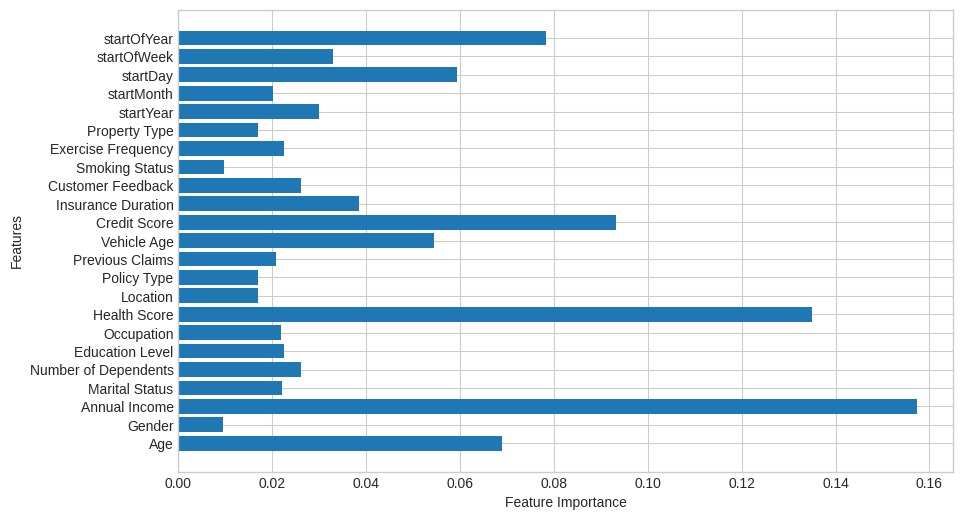

In [ ]:
# 1st method
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(X_train.columns,
        ideal_model.feature_importances_)
ax.set(xlabel='Feature Importance',
       ylabel='Features')

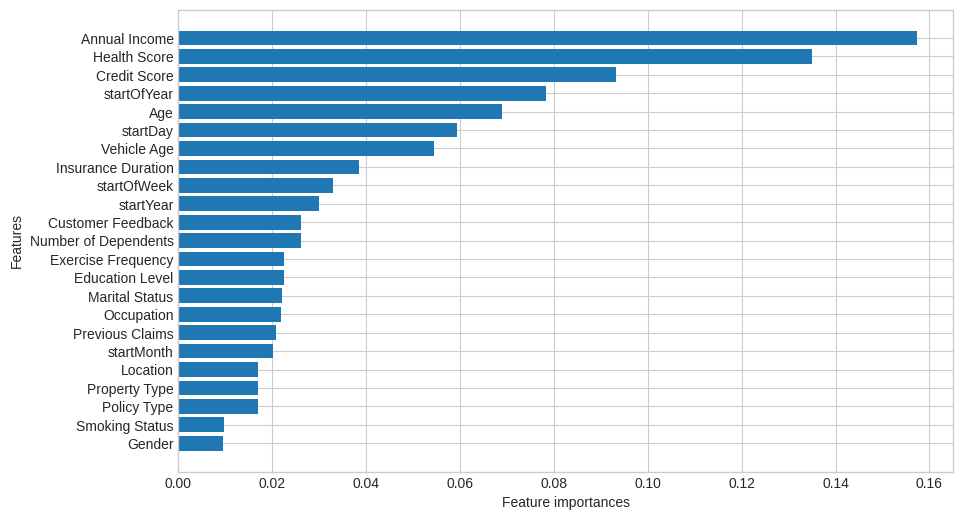

In [ ]:
# 2nd method
def plot_features(columns, importances):
  df = (pd.DataFrame({'features': columns,
                      'feature_importances': importances}).sort_values(by='feature_importances', ascending=False).reset_index(drop=True))
  # Plot the dataframe
  fig, ax = plt.subplots(figsize=(10,6))
  ax.barh(df['features'], df['feature_importances'])
  ax.set(xlabel='Feature importances',
         ylabel='Features')
  ax.invert_yaxis();

plot_features(X_train.columns, ideal_model.feature_importances_)